In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from tqdm import tqdm # para barra de progreso
import time
from sympy import init_printing
init_printing() # Esto es para renderizar las listas
import scienceplots # Para obtener graficos de alta calidad

# se pone al inicio por si se interrumpe la ejecución para que no te salga raro en la siguiente ejecución
# barra_progreso.close()

# se pone al inicio por si se interrumpe la ejecución para que no te salga raro en la siguiente ejecución
# barra_progreso.close()

plt.style.use(['science','notebook','grid','std-colors'])
#plt.style.use(['nature','no-latex'])

## Matriz del centro NV 
$$ \mathcal{H}/h = D(S_z^{2} - \frac{S(S+1)}{3}) + E(S_x^{2} - S_y^{2}) + \gamma B\cdot S $$

donde:
\begin{align}
D &= 2.87 \; GHz & \gamma &= \frac{g_e \mu_B}{\hbar} = 28 \;GHz/T \\
E &= 5 \; MHz & S&=1
\end{align}

Los operadores de spin 1
\begin{align}
S_x &= \frac{1}{\sqrt{2}}\begin{pmatrix} 0 & 1 & 0 \\ 1 & 0 & 1 \\ 0& 1& 0 \end{pmatrix} &
S_y &= \frac{1}{\sqrt{2}}\begin{pmatrix} 0 & -i & 0 \\ i & 0 & -i \\ 0& i& 0 \end{pmatrix} &
S_z &= \begin{pmatrix} 1 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & -1 \end{pmatrix}
\end{align}

Se usa los autovectores de $S_z:  \quad \{ |1\rangle = |+1\rangle\;;\; |2\rangle = |0\rangle\;;\; |3\rangle = |-1\rangle \}$


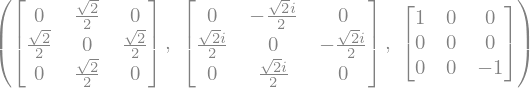

In [3]:
# Escribimos los operadores a usar
from sympy import Matrix, Rational, sqrt, I

# Los operadores espín S=1
S_x = 1/sqrt(2)*Matrix([[0,1,0],[1,0,1],[0,1,0]])
S_y = 1/sqrt(2)*Matrix([[0,-I,0],[I,0,-I],[0,I,0]])
S_z = Matrix([[1,0,0],[0,0,0],[0,0,-1]])
display((S_x,S_y,S_z))

<>:3: SyntaxWarning: invalid escape sequence '\g'
<>:3: SyntaxWarning: invalid escape sequence '\g'
C:\Users\JAAL_\AppData\Local\Temp\ipykernel_11868\3661812781.py:3: SyntaxWarning: invalid escape sequence '\g'
  D,E,gamma,B_x,B_y,B_z = symbols('D E \gamma B_x B_y B_z', real=True)


El hamiltoniano del centro NV es:


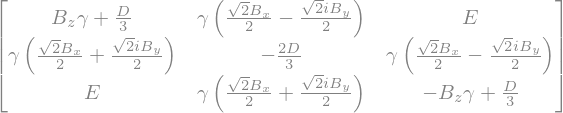

In [4]:
# expresamos el Hamiltoniano
from sympy import symbols, eye
D,E,gamma,B_x,B_y,B_z = symbols('D E \gamma B_x B_y B_z', real=True)

H = D*(S_z**2 - Rational(2,3)*eye(3)) + E*(S_x**2 - S_y**2) + gamma*(B_x*S_x + B_y*S_y + B_z*S_z)
print("El hamiltoniano del centro NV es:")
display(H)

## Frecuencias de transición vs campo magnetico / $\theta \neq0$ y $\varphi = 0$

- Se quiere visualizar como cambia las frecuencias de transición al cambiar los angulos latitud

(1.0, 0.0, 0.0, 1.0)
(0.8187488187488189, 1.0, 0.0, 1.0)
(0.0, 1.0, 0.3625004724974956, 1.0)
(0.0, 0.4562523625023619, 1.0, 1.0)
(0.7249988187488191, 0.0, 1.0, 1.0)
(1.0, 0.0, 0.09375, 1.0)


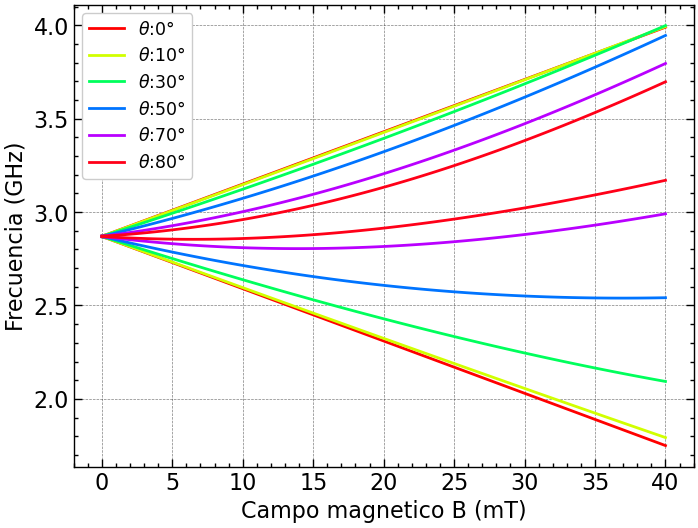

In [12]:
from sympy import re
D_eval = 2.87 # En 2.87 GHz 
gamma_eval = 28 # En 28 GHz/T .... (Haz el calculo con )

def frecuencias_calc(B_ini=-500*10**(-6),B_fin=500*10**(-6),pasos=100,theta=2*(np.pi/180),phi = 0*(np.pi/180),E_eval = 2*10**(-3)):
    '''
    Esta función retorna 3 arrays 
    1er array : El campo magnetico 
    2do array : Las frecuencias menor de transición
    3er array : Las frecuencias mayor de transición
    '''
    
    array1 = []
    array2 = []
    array3 = []
    
    for Bvalor in np.linspace(B_ini,B_fin,pasos):
        # Variables 
        Beval = Bvalor 
    
        # Reemplazar Bx, By, Bz
        Bx_eval = Beval*np.sin(theta)*np.cos(phi)
        By_eval = Beval*np.sin(theta)*np.sin(phi)
        Bz_eval = Beval*np.cos(theta)
    
        # evaluando
        Heval = H.subs({D:D_eval, E:E_eval, gamma:gamma_eval, B_x:Bx_eval, B_y:By_eval, B_z:Bz_eval}) # reemplazando
    
        # calculando autoenergias
        eigenvalores =  Heval.eigenvals()
        # Convertir los autovalores a un array
        '''
        tengo que usar la función ''re'' y no "np.real" porque los valores de autovalores son sympy 
        con esto me aseguro de solo sacar la parte real, aunque el hamiltoniano es hermitico en el algoritmo de sympy 
        te puede salir complejo de parte complejo muy bajo  
        '''

        lista = [re(val) for val in eigenvalores.keys()]
        autovalores = np.sort(lista) # ordenamos la lista
    
        # formamos una lista reducida
        frecuencias_transicion = [autovalores[2]-autovalores[0], autovalores[1]-autovalores[0]]
        
        np.array( array1.append(Bvalor) )
        np.array( array2.append(frecuencias_transicion[0]) )
        np.array( array3.append(frecuencias_transicion[1]) )
        
    return np.array([array1,array2,array3])

###############################################################
# Definir una lista de colores utilizando un mapa de colores
parametros_tetha = np.array([0,10,30,50,70,80])
colormap = plt.get_cmap('hsv', len(parametros_tetha))

for i,tetha_eval in enumerate(parametros_tetha):
    frecuencias = frecuencias_calc(B_ini=0,B_fin=40*10**(-3),pasos=100,theta=tetha_eval*(np.pi/180),
                               phi = 0*(np.pi/180),E_eval = 2*10**(-3))
    
    color_val = colormap(i)  # Seleccionar un color de la lista de colores
    print(color_val)
    plt.plot(frecuencias[0]*1000,frecuencias[2],color= color_val)   
    plt.plot(frecuencias[0]*1000,frecuencias[1],color= color_val,label=fr'$\theta$:{tetha_eval}°')
    
plt.ylabel('Frecuencia (GHz)')
plt.xlabel('Campo magnetico B (mT)')
plt.legend(fontsize=12.5)
plt.savefig("frecuenciasVScampo_magnetico(altos)_para_distintos_theta")
plt.show()

## Agregando la aproximación
\begin{equation}
    \nu_{\pm}(B_{NV}) = D \pm \sqrt{\left(\gamma B_{NV}\right)^2 + E^2}
    \label{frecuencia-aproximación-debil}
\end{equation}

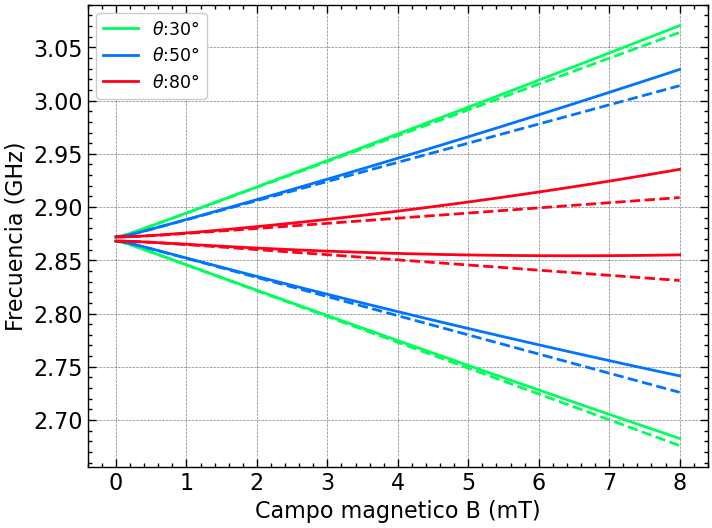

In [13]:
def frecuencias_aprox(B_ini=-500*10**(-6),B_fin=500*10**(-6),pasos=100,theta=2*(np.pi/180),phi = 0*(np.pi/180),E_eval = 2*10**(-3)):
    '''
    Esta función retorna 3 arrays 
    1er array : El campo magnetico 
    2do array : Las frecuencias menor de transición
    3er array : Las frecuencias mayor de transición
    '''
    
    array1 = []
    array2 = []
    array3 = []
    
    for Bvalor in np.linspace(B_ini,B_fin,pasos):
        # Variables 
        Beval = Bvalor 
    
        # Reemplazar Bx, By, Bz
        Bx_eval = Beval*np.sin(theta)*np.cos(phi)
        By_eval = Beval*np.sin(theta)*np.sin(phi)
        Bz_eval = Beval*np.cos(theta)
    
        # formamos una lista reducida
        frecuencias_transicion = [D_eval + np.sqrt( (gamma_eval*Bz_eval)**2 + E_eval**2), D_eval - np.sqrt( (gamma_eval*Bz_eval)**2 + E_eval**2)]
        
        np.array( array1.append(Bvalor) )
        np.array( array2.append(frecuencias_transicion[0]) )
        np.array( array3.append(frecuencias_transicion[1]) )
        
    return np.array([array1,array2,array3])


############################################3

# Definir una lista de colores utilizando un mapa de colores
parametros_tetha = np.array([0,10,30,50,70,80])
parametros_tetha2 = np.array([30,50,80])
colormap = plt.get_cmap('hsv', len(parametros_tetha))

for i,tetha_eval in enumerate(parametros_tetha2):
    
    frecuencias = frecuencias_calc(B_ini=0,B_fin=8*10**(-3),pasos=100,theta=tetha_eval*(np.pi/180),
                               phi = 0*(np.pi/180),E_eval = 2*10**(-3))
    frecuencias_cal = frecuencias_aprox(B_ini=0,B_fin=8*10**(-3),pasos=100,theta=tetha_eval*(np.pi/180),
                               phi = 0*(np.pi/180),E_eval = 2*10**(-3))
    
    # Hago esto para tener el color respectivo de la imagen anterior 
    color_val = colormap(np.where(parametros_tetha == tetha_eval)[0])  # Seleccionar un color de la lista de colores
    plt.plot(frecuencias[0]*1000,frecuencias[2],color= color_val)   
    plt.plot(frecuencias[0]*1000,frecuencias[1],color= color_val,label=fr'$\theta$:{tetha_eval}°')
    
    plt.plot(frecuencias_cal[0]*1000,frecuencias_cal[2],'--',color= color_val)   
    plt.plot(frecuencias_cal[0]*1000,frecuencias_cal[1],'--',color= color_val)
    
plt.ylabel('Frecuencia (GHz)')
plt.xlabel('Campo magnetico B (mT)')
plt.legend(fontsize=12.5)
plt.savefig("frecuenciasVScampo_magnetico(bajos)_para_distintos_theta")
plt.show()